In [2]:
# 讀取 CSV File
# Read the data into a data frame.
import pandas as pd
df = pd.read_csv('../2018-chienyeh_utf8.csv') 
df.head()

,銷貨倉,銷貨日期,銷貨次數,序號,銷貨時間,銷售金額,客戶代號,性別,藥品代號,藥品名稱,...,說明,等級,原價,折扣率,交易後庫存量,售價,銷售量,銷售額,折扣金,發票
0,09,2018/1/1,10001,1001,10:23:00,2500,0919323538,女,009571,作預付2500元-全身芳療舒壓課程-09倉 ...,...,作新預收醫美課程(原861之1-11次,A,2500,100,20,2500.0,1,2500,0,
1,13,2018/1/1,10001,1001,12:52:52,2574,572,女,4710050921359,KB99無子大葡萄乾300G ...,...,有機食品,C,99,100,3,74.3,1,74,0,
2,03,2018/1/1,10001,1001,08:58:08,2824,C01,,4715168110572,永信后保寧1.5MG(事後)1錠入 ...,...,避孕藥,A,250,100,0,250.0,1,250,0,
3,05,2018/1/1,10001,1001,11:20:48,2849,E01,男,4716022950143,防疫天使嬰幼童口罩5入(綠.藍) ...,...,口眼罩貼,A,25,100,17,25.0,1,25,0,ˇ
4,18,2018/1/1,10001,1001,09:00:34,2948,0933131405,男,4901548160132,暖暖包24H 日本桐灰(小白兔)10入 ...,...,冰熱枕包,E,99,100,135,99.0,1,99,0,ˇ


In [2]:
df_tmp = df.groupby('藥品代號')
df_drugID = df_tmp.groups.keys()

df_count = pd.DataFrame(index=df_drugID ,columns=['count'])

solution = pd.DataFrame()
solution = df.groupby('藥品代號').count();

for i in df_drugID:
    df_count.at[i,'count'] = solution.loc[i,'序號']

df_count.head()

,count
,38
471175351325,246
471395706989,1
471985394610,2
+H109681827,4


In [3]:
df_count_sorting = df_count.sort_values(by = 'count',ascending = False)
print(df_count_sorting)

                count
DPS4           41838
DRUG FARE      11966
DPS3            9156
000501          7348
DPSY            7296
...               ...
AB289211G0         1
AB29478100         1
2565886890421      1
AB301221G0         1
4714421806221      1

[13077 rows x 1 columns]


In [4]:
solution = df
solution['銷貨日期'] = pd.to_datetime(solution['銷貨日期'])
solution = solution.set_index('銷貨日期')

solution.resample('MS').sum().head()

,銷貨次數,序號,銷售金額,原價,折扣率,交易後庫存量,售價,銷售量,銷售額,折扣金
銷貨日期,,,,,,,,,,
2018-01-01,963264997,96196041,126431605,24045789,4940381,9801422,22979263.6,74008,12600278,844229
2018-02-01,890266278,88903329,114706041,21797417,4577440,10347585,20615427.2,86964,11827624,703520
2018-03-01,963946222,96070193,127230337,29098545,4887514,6146209,28127885.1,97845,12860555,841463
2018-04-01,960417718,95737335,338703740,41247251,5114180,25396789,39531393.3,97138,24403989,685618
2018-05-01,1024645342,102082952,281757491,38367798,5281237,16376828,37183557.7,100889,21591304,807427


In [5]:
solution = df

solution['銷貨日期'] = pd.to_datetime(solution['銷貨日期'])
solution = solution.set_index(['藥品代號','銷貨日期'])

solution = solution.groupby(['藥品代號','銷貨日期'])

#solution.resample('MS').count().head()

solution.sum().head()

銷貨次數    序號  銷售金額  原價  折扣率  交易後庫存量   售價  銷售量  銷售額  \
藥品代號           銷貨日期                                                            
             
 2018-01-05  30001  3001   551   0  100       0  0.0    1    0   
               2018-01-09  60004  6004  1752   0  200       0  0.0    2    0   
               2018-03-21  20009  2001   540   0  100       0  0.0    1    0   
               2018-03-23  20012  2001  2500   0  100       0  0.0    1    0   
               2018-03-24  10018  1001     0   0  100       0  0.0    1    0   

                           折扣金  
藥品代號           銷貨日期             
             
 2018-01-05    0  
               2018-01-09    0  
               2018-03-21    0  
               2018-03-23    0  
               2018-03-24    0

In [16]:
#觀看藥品每個月份的銷售量
solution = df

for i in solution.index:
    if solution.loc[i, '銷售量']<0:
        solution.loc[i, '銷售量'] = abs(solution.loc[i, '銷售量'])

solution['銷貨日期'] = pd.to_datetime(solution['銷貨日期'])
solution = solution.set_index('銷貨日期')
solution = solution.groupby('藥品代號')


sale_month = solution.resample('MS').sum()
sale_month.head(24)

銷貨次數      序號    銷售金額    原價   折扣率  交易後庫存量  \
藥品代號           銷貨日期                                                      
             
 2018-01-01    90005    9005    2303     0   300       0   
               2018-02-01        0       0       0     0     0       0   
               2018-03-01    60057    6012    5374     0   400       0   
               2018-04-01    60007    6003   22864     0   300       0   
               2018-05-01    40017    4005    5330     0   200       0   
               2018-06-01    90028    9004    2740     0   300       0   
               2018-07-01   140024   14022   29091     0   600       0   
               2018-08-01    30011    3003    2590     0   100       0   
               2018-09-01    40009    4006    5268     0   200       0   
               2018-10-01    60023    6006    2668     0   200       0   
               2018-11-01   110021   11010   84710     0   500       0   
               2018-12-01   150032   15009   11383     0   600       0   
 471175351325
 2018-01-01   661040   66448   62712  3005  3600     877   
               2018-02-01   320517   31346   42070     0  1800    -191   
               2018-03-01   410833   41293   91609  3004  2900     378   
               2018-04-01   570676   57247  333344  2000  3500    -236   
               2018-05-01  1241561  123483  278640  6524  5900    -169   
               2018-06-01   120276   12097    9287     4   600    -121   
               2018-07-01   180152   18060   44970     4  1100      -7   
               2018-08-01   300172   30055   22590     2  1300    -105   
               2018-09-01   180158   18019   18080     0   800     -11   
               2018-10-01   260326   26082   40695     0  1285    -783   
               2018-11-01   160186   16050   16393     0   900   -1167   
               2018-12-01    90156    9029     902     0   500      50   

                               售價  銷售量   銷售額  折扣金  
藥品代號           銷貨日期                                
             
 2018-01-01     0.0    3     0    0  
               2018-02-01     0.0    0     0    0  
               2018-03-01     0.0    4     0    0  
               2018-04-01     0.0    3     0    0  
               2018-05-01     0.0    2     0    0  
               2018-06-01     0.0    3     0    0  
               2018-07-01     0.0    6     0    0  
               2018-08-01     0.0    1     0    0  
               2018-09-01     0.0    2     0    0  
               2018-10-01     0.0    2     0    0  
               2018-11-01     0.0    5     0    0  
               2018-12-01     0.0    6     0    0  
 471175351325
 2018-01-01  3005.0   36  3004    1  
               2018-02-01     0.0   18     0    0  
               2018-03-01  2504.0   31  3004    0  
               2018-04-01  2000.0   38  2000    0  
               2018-05-01  5524.0   66  5524    0  
               2018-06-01     4.0    6     5    1  
               2018-07-01     4.0   12     4    0  
               2018-08-01     0.0   15     0    0  
               2018-09-01     0.0    9     0    0  
               2018-10-01     0.0  317     0    0  
               2018-11-01     0.0   14     0    0  
               2018-12-01     0.0    5     0    0

In [18]:
#觀看藥品年度總銷售排名
solution = df

for i in solution.index:
    if solution.loc[i, '銷售量']<0:
        solution.loc[i, '銷售量'] = abs(solution.loc[i, '銷售量'])

solution = solution.groupby('藥品代號')
solution.sum().sort_values(by = '銷售量', ascending = False).head(25)

,銷貨次數,序號,銷售金額,原價,折扣率,交易後庫存量,售價,銷售量,銷售額,折扣金
藥品代號,,,,,,,,,,
050000,13924950,1384306,5381372,1101,110603,-88934652,17381.0,310241,327927,1000
777,19664699,1929836,3694335,2515,126303,-2111750,1505625.3,250985,1976121,1011
NC033541G0,1033727,104579,383568,448,5200,-490090,170.5,133427,161660,4000
000100,54068555,5358508,59910128,319599,318800,193389108,320298.0,92173,9218746,48
DPSZ,160189,16027,75308,8,1000,-3,8.0,51320,0,51318
DPS4,895407715,89403651,220286950,114048701,4183800,-25,114048701.0,41839,114050700,1800
AC24375100,70265,7105,60371,48,400,-63092,6.0,40089,52500,0
AC41316100,370641,37206,163630,64,2500,-23690,65.8,37796,32293,0
BC23016100,1924529,191498,253998,654,11300,11110,538.5,31445,65851,150


In [23]:
import matplotlib.pyplot as plt



#solution = pd.DataFrame(columns = ['銷貨日期','銷售量'])
#sale_month.loc[('471175351325',slice(None)),:]
#df2.loc[('语文',slice(None)),:]


sale_month.index.get_level_values('藥品代號').unique().tolist()





['             \x1c',
 ' 471175351325\x1c',
 ' 471395706989\x1c',
 ' 471985394610\x1c',
 '+H109681827  \x1c',
 '+H4440050830 \x1c',
 ',            \x1c',
 '.            \x1c',
 '000000       \x1c',
 '0000000231062\x1c',
 '0000000821001\x1c',
 '0000000821002\x1c',
 '0000000821003\x1c',
 '0000047109605\x1c',
 '0000047164048\x1c',
 '00000505     \x1c',
 '000100       \x1c',
 '000102       \x1c',
 '000103       \x1c',
 '00020        \x1c',
 '0002345709990\x1c',
 '000250       \x1c',
 '000300       \x1c',
 '000397       \x1c',
 '000399       \x1c',
 '0003990      \x1c',
 '0003993      \x1c',
 '000400       \x1c',
 '0004001      \x1c',
 '000402       \x1c',
 '000403       \x1c',
 '000415       \x1c',
 '0004155      \x1c',
 '0004233      \x1c',
 '000429       \x1c',
 '000460       \x1c',
 '000462       \x1c',
 '000500       \x1c',
 '000501       \x1c',
 '000502       \x1c',
 '000506       \x1c',
 '0005062      \x1c',
 '0005065      \x1c',
 '000513       \x1c',
 '000521       \x1c',
 '000530  

In [32]:
sale_month.index.get_level_values('銷貨日期').unique()

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='銷貨日期', freq=None)

In [20]:
sale_month.xs(('050000       \x1c', '2018-01-01')).loc['銷售量']

3235.0

In [21]:
#sale_month.xs(('050000       \x1c', '2018-01-01')).loc['銷售量']

month_list_2018=sale_month.index.get_level_values('銷貨日期').unique()
#month_list_2018


pharamcy_050000 = pd.DataFrame(index=month_list_2018,columns=['Sales'])

for i in month_list_2018:
    pharamcy_050000.at[i,'Sales'] = sale_month.xs(('050000       \x1c', i)).loc['銷售量']


pharamcy_050000

,Sales
銷貨日期,
2018-01-01,3235
2018-02-01,4468
2018-03-01,2166
2018-04-01,2512
2018-05-01,33303
2018-06-01,29864
2018-07-01,57810
2018-08-01,21723
2018-09-01,37725


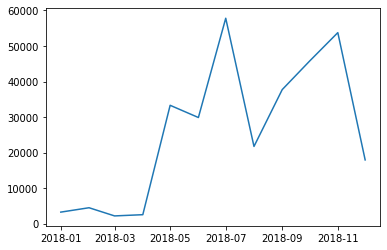

In [23]:
import matplotlib.pyplot as plt

plt.plot(pharamcy_050000)

In [13]:
solution = df

if solution.loc[0,'銷售量']>0:
    print('yes')
#for i in solution.index:
    #print(abs(solution.loc[i,'銷售量'])

yes


In [ ]:
solution = df

for i in solution.index:
    if solution.loc[i, '銷售量']<0:
        solution.loc[i, '銷售量'] = abs(solution.loc[i, '銷售量'])
        
solution['銷貨日期'] = pd.to_datetime(solution['銷貨日期'])
solution = solution.set_index('銷貨日期')
solution = solution.groupby('藥品代號')

sale_day = solution.resample('D').sum()

sale_day.head(24)


In [3]:
date_list_2018=sale_day.xs('050000       \x1c').index.get_level_values('銷貨日期').unique()
sol = pd.DataFrame(index=date_list_2018,columns=['Sales'])

for i in date_list_2018:
    sol.at[i,'Sales'] = sale_day.xs(('050000       \x1c', i)).loc['銷售量']

sol.head(100)

,Sales
銷貨日期,
2018-01-01,169
2018-01-02,0
2018-01-03,0
2018-01-04,0
2018-01-05,100
...,...
2018-04-06,0
2018-04-07,0
2018-04-08,0


C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37559 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 37559 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\back

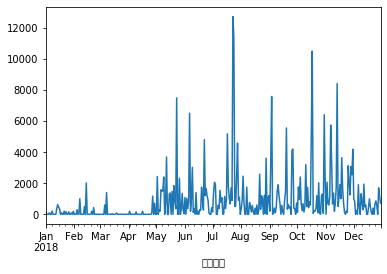

In [4]:
sol['Sales'].plot()

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 

#2018-10-01以前做training data 以後做test data
split_date = pd.Timestamp('2018-10-01') 
df_tmp = sol['Sales'] 
train = df_tmp.loc[:split_date] 
test = df_tmp.loc[split_date:] 
plt.figure(figsize=(10, 6)) 
ax = train.plot() 
test.plot(ax=ax) 
plt.legend(['train', 'test']);


NameError: name 'pd' is not defined

In [9]:
import pandas as pd 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import r2_score 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.callbacks import EarlyStopping 
from keras.optimizers import Adam 
from keras.layers import LSTM


Using TensorFlow backend.
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mhlab\Anaconda3\envs\py36\lib\site-packag

In [8]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=093423124b0078d5dfe08e6341b56d007679a1d590ac80bc9c1ac20be16ee62f
  Stored in directory: c:\users\mhlab\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [20]:
train = np.array(train)
test = np.array(test)

In [13]:
def transform_dataset(dataset, look_back=1):
    # 前 N 天的股價
    dataX = [dataset[i:(i + look_back)]
             for i in range(len(dataset) - look_back - 1)]
    # 第 N 天的股價
    dataY = [dataset[i + look_back : ]
             for i in range(len(dataset) - look_back - 1)]
    return np.array(dataX), np.array(dataY)

NameError: name 'train_sc' is not defined

In [10]:
nn_model = Sequential() 
nn_model.add(Dense(12, input_dim=1, activation='relu')) 
nn_model.add(Dense(1)) 
nn_model.compile(loss='mean_squared_error', optimizer='adam') 
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1) 
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)


'ls' 不是內部或外部命令、可執行的程式或批次檔。
